# Table of Contents
 <p><div class="lev1 toc-item"><a href="#ALGO1-:-Introduction-à-l'algorithmique" data-toc-modified-id="ALGO1-:-Introduction-à-l'algorithmique-1"><span class="toc-item-num">1&nbsp;&nbsp;</span><a href="https://perso.crans.org/besson/teach/info1_algo1_2019/" target="_blank">ALGO1 : Introduction à l'algorithmique</a></a></div><div class="lev1 toc-item"><a href="#Cours-Magistral-6" data-toc-modified-id="Cours-Magistral-6-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Cours Magistral 6</a></div><div class="lev2 toc-item"><a href="#Rendu-de-monnaie" data-toc-modified-id="Rendu-de-monnaie-21"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Rendu de monnaie</a></div><div class="lev2 toc-item"><a href="#Structure-&quot;Union-Find&quot;" data-toc-modified-id="Structure-&quot;Union-Find&quot;-22"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Structure "Union-Find"</a></div><div class="lev3 toc-item"><a href="#Naïve" data-toc-modified-id="Naïve-221"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>Naïve</a></div><div class="lev3 toc-item"><a href="#Avec-compression-de-chemin" data-toc-modified-id="Avec-compression-de-chemin-222"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>Avec compression de chemin</a></div><div class="lev2 toc-item"><a href="#Algorithme-de-Kruskal" data-toc-modified-id="Algorithme-de-Kruskal-23"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Algorithme de Kruskal</a></div><div class="lev2 toc-item"><a href="#Illustrations" data-toc-modified-id="Illustrations-24"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Illustrations</a></div><div class="lev2 toc-item"><a href="#Autres" data-toc-modified-id="Autres-25"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Autres</a></div><div class="lev2 toc-item"><a href="#Conclusion" data-toc-modified-id="Conclusion-26"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Conclusion</a></div>

# [ALGO1 : Introduction à l'algorithmique](https://perso.crans.org/besson/teach/info1_algo1_2019/)

- [Page du cours](https://perso.crans.org/besson/teach/info1_algo1_2019/) : https://perso.crans.org/besson/teach/info1_algo1_2019/
- Magistère d'Informatique de Rennes - ENS Rennes - Année 2019/2020
- Intervenants :
  + Cours : [Lilian Besson](https://perso.crans.org/besson/)
  + Travaux dirigés : [Raphaël Truffet](http://perso.eleves.ens-rennes.fr/people/Raphael.Truffet/)
- Références :
  + [Open Data Structures](http://opendatastructures.org/ods-python.pdf)

# Cours Magistral 6

- Ce cours traite des algorithmes gloutons.
- Ce notebook sera concis, comparé aux précédents.

## Rendu de monnaie

- Voir https://en.wikipedia.org/wiki/Change-making_problem ou https://fr.wikipedia.org/wiki/Probl%C3%A8me_du_rendu_de_monnaie

In [7]:
def coin_change(x, R):
    """Coin change

    :param x: table of non negative values
    :param R: target value
    :returns bool: True if there is a non negative linear combination
    of x that has value R
    :complexity: O(n*R)
    """
    if int(R) != R:  # we work with 1/100
        R = int(R * 100)
        x = [int(xi * 100) for xi in x]
    b = [False] * (R + 1)
    b[0] = True
    for xi in x:
        for s in range(xi, R + 1):
            b[s] |= b[s - xi]
    return b[R]

Avec les pièces des euros :

In [8]:
billets = [500, 200, 100, 50, 20, 10, 5]
pieces = [2, 1, 0.5, 0.2, 0.1, 0.05, 0.02, 0.01]
euros = billets + pieces

coin_change(euros, 16.12)

True

In [9]:
billets = [500, 200, 100, 50, 20, 10, 5]

coin_change(billets, 16)

False

Avec un autre système de pièce :

In [8]:
billets = [500, 200, 100, 50, 20, 10, 5]
pieces = [2, 1, 0.5, 0.2, 0.1, 0.05, 0.02, 0.01]
euros = billets + pieces

coin_change(euros, 16.12)

True

## Structure "Union-Find"

### Naïve

In [46]:
class UnionFind:
    """Maintains a partition of {0, ..., n-1}
    """
    def __init__(self, n):
        self.up_bound = list(range(n))

    def find(self, x_index):
        """
        :returns: identifier of part containing x_index
        :complex_indexity: O(n) worst case.
        """
        if self.up_bound[x_index] == x_index:
            return x_index
        self.up_bound[x_index] = self.find(self.up_bound[x_index])
        return self.up_bound[x_index]

    def union(self, x_index, y_index):
        """
        Merges part that contain x and part containing y
        :returns: False if x_index, y_index are already in same part
        :complexity: O(n) worst case.
        """
        repr_x = self.find(x_index)
        repr_y = self.find(y_index)
        if repr_x == repr_y:       # already in the same component
            return False
        self.up_bound[repr_x] = repr_y
        return True

### Avec compression de chemin

In [14]:
class UnionFind_CompressedPaths:
    """Maintains a partition of {0, ..., n-1}
    """
    def __init__(self, n):
        self.up_bound = list(range(n))
        self.rank = [0] * n

    def find(self, x_index):
        """
        :returns: identifier of part containing x_index
        :complex_indexity: O(inverse_ackerman(n))
        """
        if self.up_bound[x_index] == x_index:
            return x_index
        self.up_bound[x_index] = self.find(self.up_bound[x_index])
        return self.up_bound[x_index]

    def union(self, x_index, y_index):
        """
        Merges part that contain x and part containing y
        :returns: False if x_index, y_index are already in same part
        :complexity: O(inverse_ackerman(n))
        """
        repr_x = self.find(x_index)
        repr_y = self.find(y_index)
        if repr_x == repr_y:       # already in the same component
            return False
        if self.rank[repr_x] == self.rank[repr_y]:
            self.rank[repr_x] += 1
            self.up_bound[repr_y] = repr_x
        elif self.rank[repr_x] > self.rank[repr_y]:
            self.up_bound[repr_y] = repr_x
        else:
            self.up_bound[repr_x] = repr_y
        return True

## Algorithme de Kruskal

In [47]:
def kruskal(graph, weight):
    """Minimum spanning tree by Kruskal

    :param graph: undirected graph in listlist or listdict format
    :param weight: in matrix format or same listdict graph
    :returns: list of edges of the tree
    :complexity: ``O(|E|log|E|)``
    """
    u_f = UnionFind(len(graph))
    edges = []
    for u, _ in enumerate(graph):
        for v in graph[u]:
            edges.append((weight[u][v], u, v))
    edges.sort()
    min_span_tree = []
    # in increasing order!
    for w_idx, u_idx, v_idx in edges:
        if u_f.union(u_idx, v_idx):
            min_span_tree.append((u_idx, v_idx))
    return min_span_tree

## Illustrations

In [48]:
import random
import math

In [49]:
def dist(a, b):
    """
    distance between point a and point b
    """
    return math.sqrt(sum([(a[i] - b[i]) * (a[i] - b[i]) for i in range(len(a))]))

In [50]:
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (10, 7)
mpl.rcParams['figure.dpi'] = 120
import matplotlib.pyplot as plt

import seaborn as sns
sns.set(context="notebook", style="whitegrid", palette="hls", font="sans-serif", font_scale=1.1)

In [51]:
N = 50
points = [[random.random() * 5, random.random() * 5] for _ in range(N)]
weight = [[dist(points[i], points[j]) for j in range(N)]
          for i in range(N)]
graph = [[j for j in range(N) if i != j] for i in range(N)]

min_span_tree = kruskal(graph, weight)

<Figure size 1200x840 with 0 Axes>

Text(0.5, 1.0, 'The whole graph')

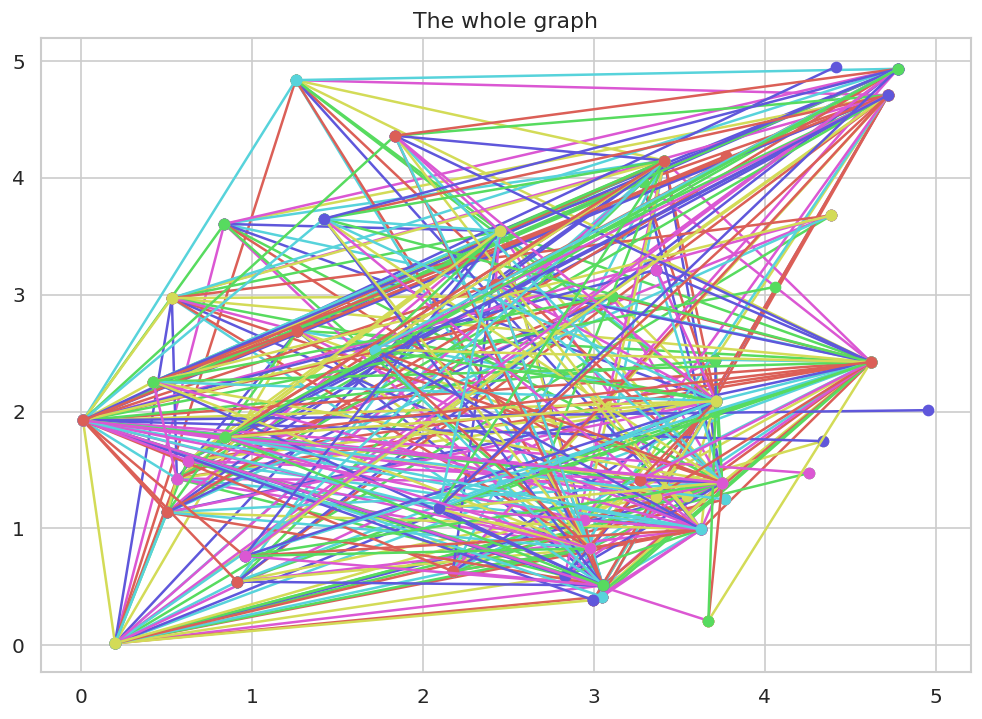

In [52]:
plt.figure()
for u in points:
    for v in points:
        if u > v: break
        xu, yu = u
        xv, yv = v
        _ = plt.plot([xu, xv], [yu, yv], 'o-')
        # print("{} -- {}".format(points[u_idx], points[v_idx]))
plt.title("The whole graph")
plt.show()

<Figure size 1200x840 with 0 Axes>

23.722617544170213


Text(0.5, 1.0, 'Minimum spanning tree of cost 23.72')

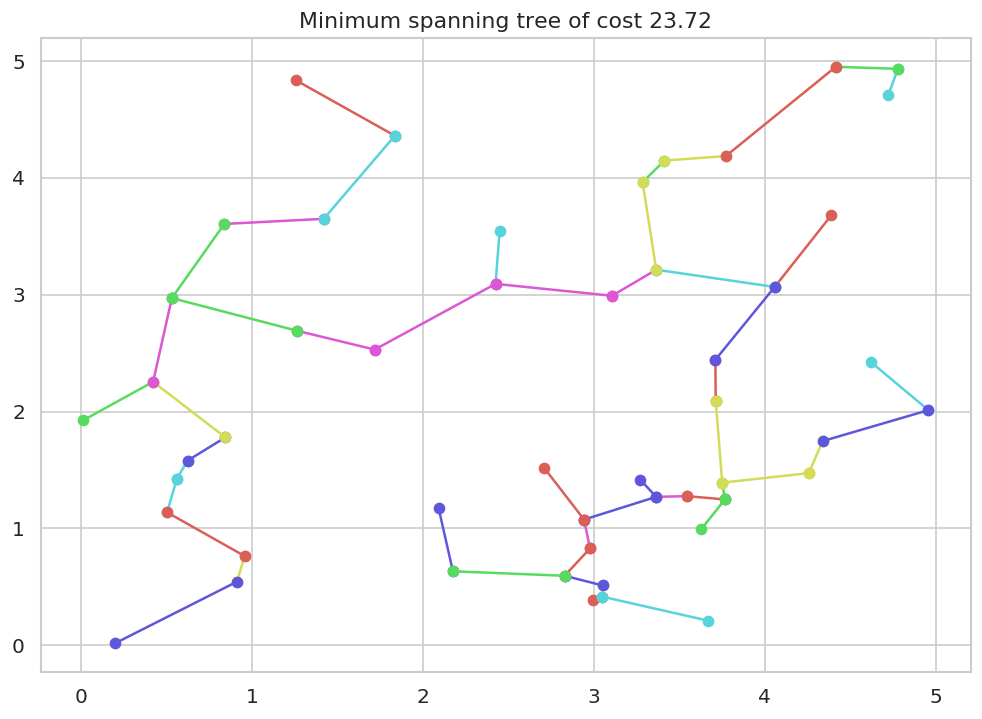

In [53]:
plt.figure()
val = 0
for u_idx, v_idx in min_span_tree:
    val += weight[u_idx][v_idx]
    xu, yu = points[u_idx]
    xv, yv = points[v_idx]
    _ = plt.plot([xu, xv], [yu, yv], 'o-')
    # print("{} -- {}".format(points[u_idx], points[v_idx]))
print(val)
plt.title("Minimum spanning tree of cost {}".format(round(val, 2)))
plt.show()

## Autres

On en écrira plus tard !

## Conclusion

C'est bon pour aujourd'hui !